# **All imports**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

# **Importing Data**

In [99]:
link='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
bank_raw=pd.read_csv(link, sep=';')
bank_raw.to_csv('/workspaces/machine-learning-banking-data/data/raw/bank_raw.csv')

# **Data variables dictionary:**

*    age: Age of customer (numeric)
*    job: Type of job (categorical)
*    marital: Marital status (categorical)
*    education: Level of education (categorical)
*    default.: do you currently have credit (categorical)
*    housing: do you have a housing loan (categorical)
*    loan: Do you have a personal loan? (categorical)
*    contact: Type of contact communication (categorical)
*    month: Last month in which you have been contacted (categorical)
*    day_of_week: Last day on which you have been contacted (categorical)
*    duration: Duration of previous contact in seconds (numeric)
*    campaign: Number of contacts made during this campaign to the customer (numeric)
*    pdays: Number of days that elapsed since the last campaign until the customer was contacted (numeric)
*    previous: Number of contacts made during the previous campaign to the customer (numeric)
*    poutcome: Result of the previous marketing campaign (categorical).
*    emp.var.rate: Employment variation rate. Quarterly indicator (numeric)
*    cons.price.idx: Consumer price index. Monthly indicator (numeric)
*    cons.conf.idx: Consumer confidence index. Monthly indicator (numeric)
*    euribor3m: EURIBOR 3-month rate. Daily indicator (numeric)
*    nr.employed: Number of employees. Quarterly indicator (numeric)
*    y. TARGET: Whether the customer takes out a long-term deposit or not

# **Data exploration & descriptive analysis**

## Preliminary exploration:

These data does not seem to have missing values, so far. Further exploration needed to check if missing values are coded differently:

In [100]:
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The actual values of variables such as default and poutcome suggest that htere is missing information in the data but it is coded differently (i.e, unknown, nonexistent)

In [101]:
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Checking for duplicates overall: there seem to be 12 duplicated observations in data

In [102]:
print(bank_raw.duplicated().sum())

12


In [103]:
bank_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

There are 13 individuals with the exact same demographic and campaign data:

In [104]:
dem=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
bank_raw[bank_raw.duplicated(dem)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


The odds that some observations have the same demographic information such as: 'age', 'job', 'marital', 'education', 'default', 'housing', and 'loan' are low but not zero.

However, the odds that observations not only have the same demographic data but also the exact same data on campaign variables such as: 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','previous', and 'poutcome' are almost null. Therefore, I treat these observations as duplicates and proceed to delete them from data.

In [105]:
bank_raw.drop_duplicates(subset=dem, inplace=True)
bank_raw.reset_index(drop=True, inplace=True)

Duplicates on the following variables are expected as these variables are not at the customer level (i.e., they do not vary by customer):

In [106]:
print(bank_raw.duplicated(['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']).sum())

40800


---

Although the latter variables are significant economic indicators that could affect the **overall**, not individual, consumer behaviour on whether or not signing up for a long-term deposit, at the individual level these variables **do not** add relevant information to the model since the goals is predicting **which type** of customers would get a long-term deposit.

Additionally, these economic indicators are already embeded on the customer demographics. For instance, one could argue that highly educated people are more likely to pay attention to macroeconomic indicators, and therefore, base their financial decisions according to the economy. On the other hand, the average customer may contract financial services regardless of economic variables.

From a statistical and model construction perspective, these economic variables also do no add much valuable data to the model since they do not vary for each customer,e.g. not enough variation, which could introduce bias to the model, overfitting, and poor predictive power. Therefore, the following variables will be **removed**: emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'



In [107]:
bank_raw.drop(['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace=True, axis=1)

## **Exploring numerical variables**



*   Percentile values of pdays and previous seem off. Further exploration needed

In [108]:
num=['age','duration','campaign','pdays','previous']#list containing numerical variables
bank_raw[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41175.0,40.023898,10.420788,17.0,32.0,38.0,47.0,98.0
duration,41175.0,258.318421,259.307930,0.0,102.0,180.0,319.0,4918.0
campaign,41175.0,2.567917,2.770341,1.0,1.0,2.0,3.0,56.0
pdays,41175.0,962.463922,186.939285,0.0,999.0,999.0,999.0,999.0
previous,41175.0,0.173018,0.494970,0.0,0.0,0.0,0.0,7.0


Most values of 'pdays' are coded as 999. In many cases, missing data is coded with 9s. The '999' value also does not seem to make sense when compared to the other values since it would mean that the customers waited 2.7 years (999 days) since last campaign to be contacted again.

In [109]:
bank_raw['pdays'].value_counts(ascending=False)

pdays
999    39660
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

To ease the interpretation during univariate and multivariate analysis, the variable duration will be coded in minutes instead of seconds and only the variable in minutes will be kept:

In [110]:
bank_raw['duration_min']=bank_raw['duration']/60
bank_raw.drop('duration', inplace=True, axis=1) #deleting the variable in seconds

num[1]='duration_min'#updating the list containing numerical variables to the new duration_min

In [111]:
bank_raw['duration_min'].describe()

count    41175.000000
mean         4.305307
std          4.321799
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_min, dtype: float64

## **Exploring non-numerical variables**

Variable poutcome has a major number of missing data (35k observations):

In [112]:
bank_raw.describe(include='O').T

,count,unique,top,freq
job,41175,12,admin.,10419
marital,41175,4,married,24920
education,41175,8,university.degree,12164
default,41175,3,no,32576
housing,41175,3,yes,21571
loan,41175,3,no,33937
contact,41175,2,cellular,26134
month,41175,10,may,13766
day_of_week,41175,5,thu,8618
poutcome,41175,3,nonexistent,35550


## Missing data:

Based on the following value count, missing information is coded as 'unknown' or 'nonexistent':

In [113]:
no_num=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y']
for n in no_num:
  print(bank_raw[n].value_counts())
  print('\n')

job
admin.           10419
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24920
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64


education
university.degree      12164
high.school             9512
basic.9y                6044
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


default
no         32576
unknown     8596
yes            3
Name: count, dtype: int64


housing
yes        21571
no         18614
unknown      990
Name: count, dtype: int64


loan
no         33937
yes         6248
unknown      990
Name: count, dtype: int64


contact
cellular     26134
telephone    15041
Name: coun

Coding missing values using pandas' default setting:

In [114]:
bank_raw.replace(['unknown','nonexistent'], pd.NA, inplace=True)

In [115]:
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,duration_min
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,<NA>,no,4.350000
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,1,999,0,<NA>,no,2.483333
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,<NA>,no,3.766667
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,<NA>,no,2.516667
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,<NA>,no,5.116667


## Revising data **again** after re-coding missing values

In [116]:
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41175 non-null  int64  
 1   job           40845 non-null  object 
 2   marital       41095 non-null  object 
 3   education     39445 non-null  object 
 4   default       32579 non-null  object 
 5   housing       40185 non-null  object 
 6   loan          40185 non-null  object 
 7   contact       41175 non-null  object 
 8   month         41175 non-null  object 
 9   day_of_week   41175 non-null  object 
 10  campaign      41175 non-null  int64  
 11  pdays         41175 non-null  int64  
 12  previous      41175 non-null  int64  
 13  poutcome      5625 non-null   object 
 14  y             41175 non-null  object 
 15  duration_min  41175 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.0+ MB


-----------------------------------------------------------------------
*    poutcome and default have the highest total of missing data, roughly 35k and 8k, respectively:

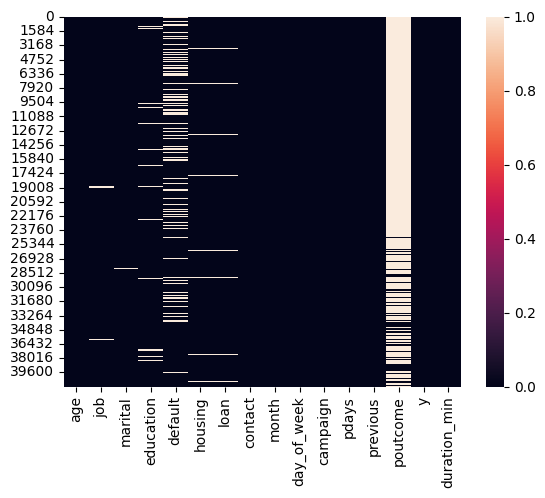

poutcome        35550
default          8596
education        1730
housing           990
loan              990
job               330
marital            80
age                 0
contact             0
month               0
day_of_week         0
campaign            0
pdays               0
previous            0
y                   0
duration_min        0
dtype: int64


In [117]:
sns.heatmap(bank_raw.isna())
plt.show()
print(bank_raw.isna().sum().sort_values(ascending=False))

-------------------------------------------------------------------------
*    The 'poutcome' variable could be a key predictor of the current campaign (see cross tab below). It is possible that the missing values of this variable were initially coded as 'nonexistent' if, for example, the bank expanded its customer base for this new campaign. Therefore, there are no outcome results for these individuals on the previous campaign. To not loose more than 30K observations, I will recode the missing data for this variable back to 'nonexistent'

In [118]:
bank_raw['poutcome'].fillna('nonexistent', inplace=True)

In [119]:
pd.crosstab(bank_raw['poutcome'], bank_raw['y'])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32410,3140
success,479,894


# Univariate analysis

## Histograms - Numeric data

In [120]:
num

['age', 'duration_min', 'campaign', 'pdays', 'previous']

*    Most of the bank's customer base is between 20 and 40 years old
*    Most customer calls last less than 20 min
*    The variables campaign and elapsed seem to have some quite extreme values, which hinder the interpretation of the graph. Further exploration is needed.
*    According to 'previous', most customers were contacted less than 2 times during the previous campaign

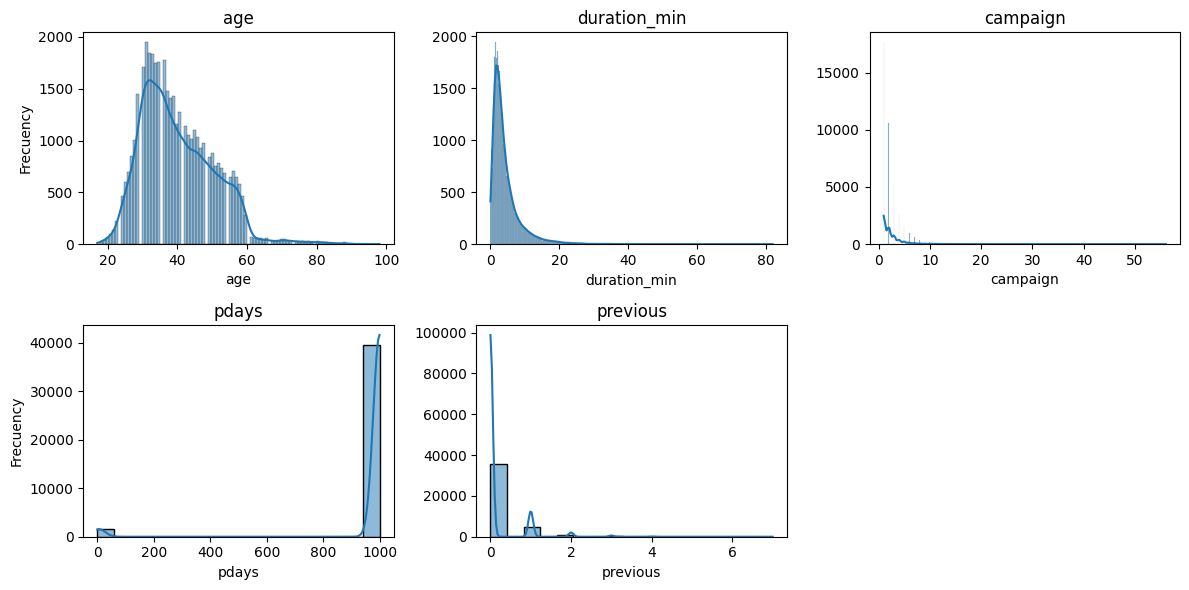

In [121]:
cols=3
rows=((len(num) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3))

for col, ax in zip(num, axis.flatten()):
  sns.histplot(bank_raw[col], kde=True, ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')

axis[0,0].set_ylabel('Frecuency')
axis[1,0].set_ylabel('Frecuency')

#removing empty subplots
for i in range(len(num), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

## Barplots - Categorical data

In [122]:
no_num

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

*    Most bank customers have an administrative job. Followed by a blue-collar, and technician job type
*    Most of the invidviduals are married
*    Most of the invidviduals have a high school diploma or university degree
*    Most of them have not fallen on credit default
*    most of the custumer were contated by mobile phone

/tmp/ipykernel_868/1549229817.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_868/1549229817.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
/tmp/ipykernel_868/1549229817.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,3].set_xticklabels(axis[1,3].get_xticklabels(), rotation=90)


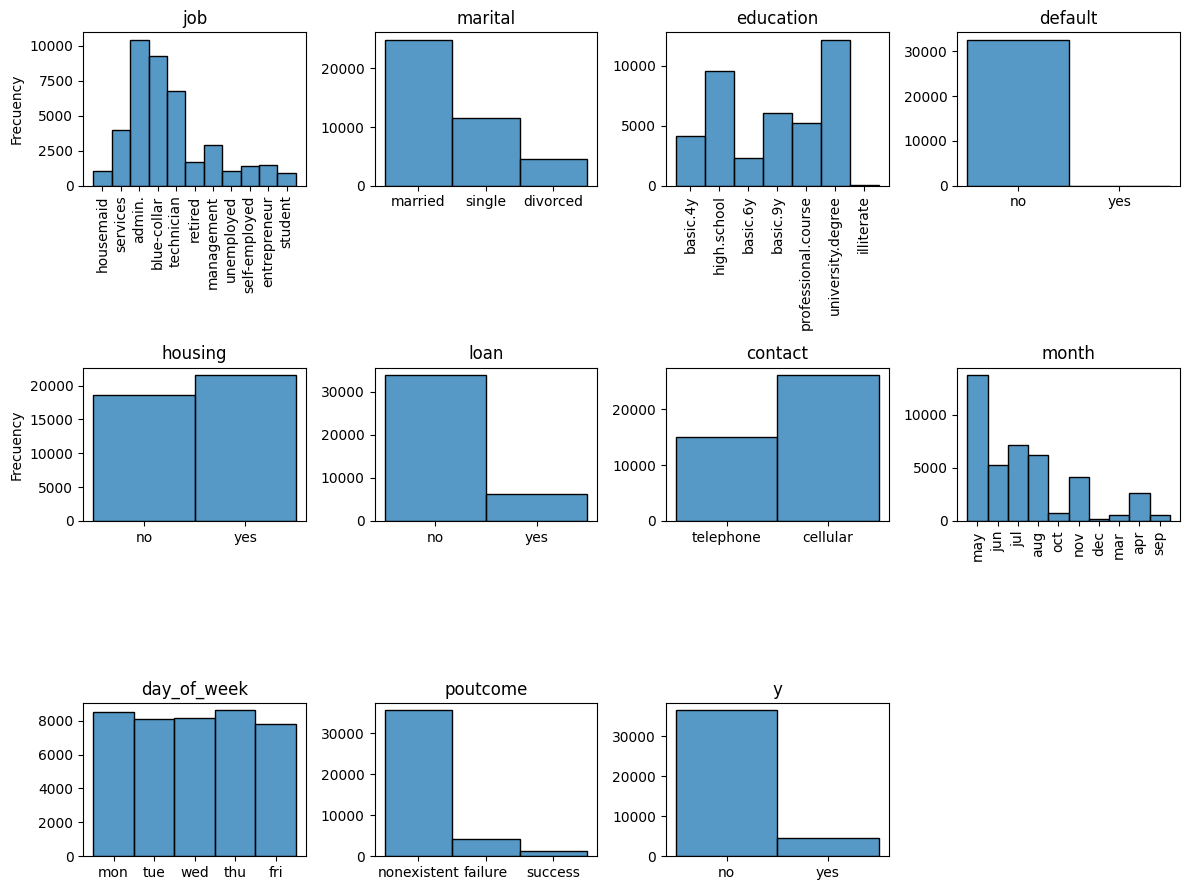

In [123]:
cols=4
rows=((len(no_num) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3))

for col, ax in zip(no_num, axis.flatten()):
  sns.histplot(bank_raw[col], kde=False, ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')
  ax.set_xlabel('')

axis[0,0].set_ylabel('Frecuency')
axis[1,0].set_ylabel('Frecuency')
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
axis[1,3].set_xticklabels(axis[1,3].get_xticklabels(), rotation=90)

#removing empty subplots
for i in range(len(no_num), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

# Multivariate analysis

## Multicollinearity assessment

*    There are no major correlations among most variables
*    There is some negative correlation between the number of days elapsed since the last campaign until the customer was contacted and the number of contacts made during the previous campaign. Meaning that a higher number of times a customer was contacted during the previous campaign is associated with less elapsed days. However, keep in mind that pdays seem to have a lot of missing data coded as 999, pandas interprets this value as number and not as missing  

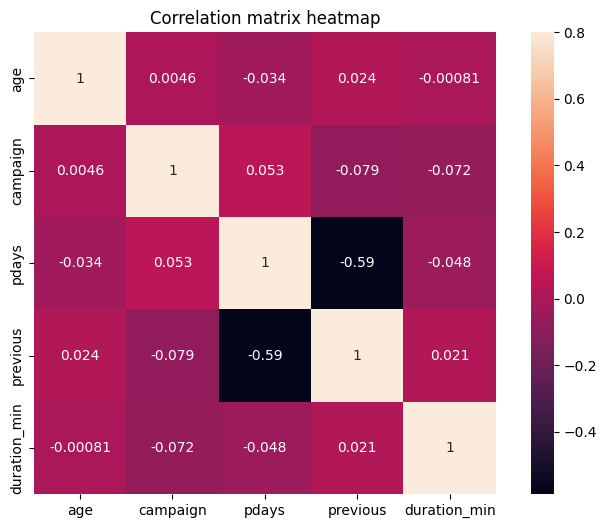

In [124]:
corr = bank_raw.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, vmax=.8, square=True, annot=True)
plt.title('Correlation matrix heatmap')
plt.show()

*    There is a extreme value for campaign when it takes a value of more than 50 times
*    The values of 'pdays', according to the pairplot, concentrate on two extremes, which, as discussed before, could be that 999 in this case means missing data
*    The variable duration seems to have extreme values for calls that lasted more than 60 minutes

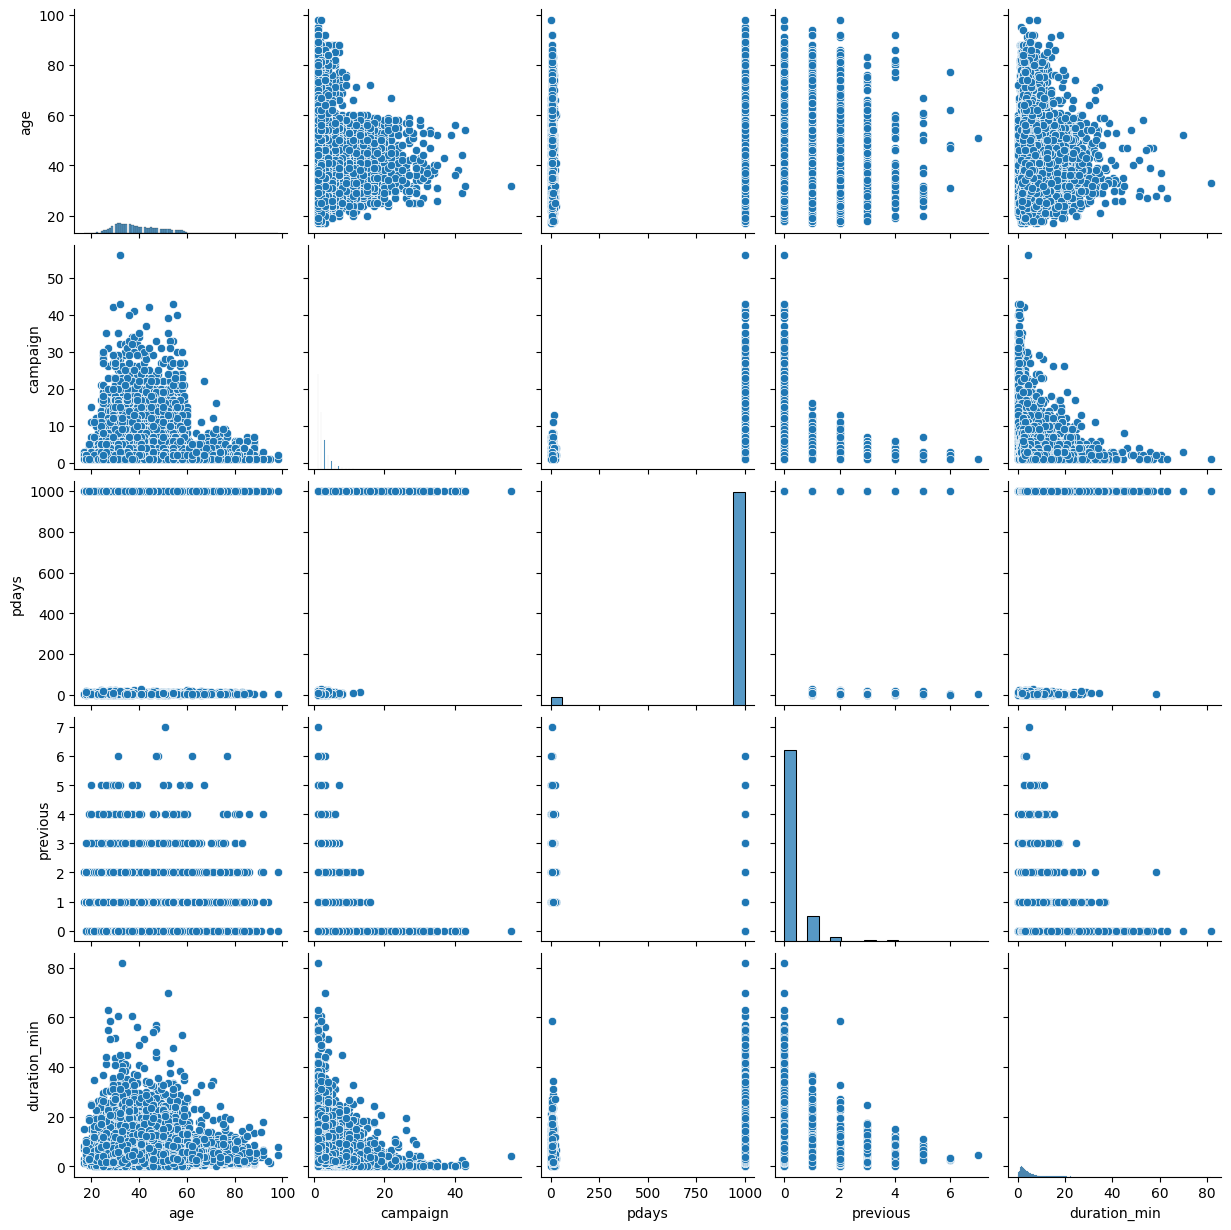

In [125]:
sns.pairplot(bank_raw, corner=False)
plt.show()

The months of most activity were may, june, july and august, whereas all days of the week had a similar activity

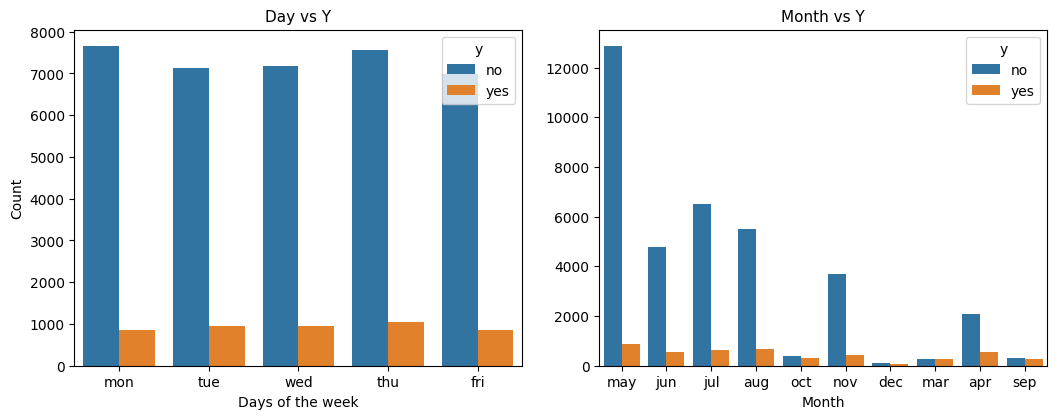

In [126]:
fig=plt.figure()
fig1=fig.add_axes([0.1,0.1,0.7,0.7])
fig2=fig.add_axes([0.92,0.1,0.7,0.7]) #coodinates: [x, y,] size[width, height]
sns.countplot(data=bank_raw, x='day_of_week', hue='y' ,ax=fig1)
fig1.set_ylabel('Count')
fig1.set_xlabel('Days of the week')
fig1.set_title('Day vs Y').set_fontsize(11)
sns.countplot(data=bank_raw, x='month', hue='y', ax=fig2)
fig2.set_ylabel('')
fig2.set_xlabel('Month')
fig2.set_title('Month vs Y').set_fontsize(11)
plt.show()


# Data Cleaning - Feature engineering

Based on the previous data exploration:
*   The variable pdays will be deleted as it can introduce noise to the model given that most values are coded as 999, which are likely missing data
*   Extreme values will be removed for:
    *   Calls of more than 60 min lenght (duration_min>60)
    *   Campaign with values of more than 50





In [127]:
bank_raw.drop('pdays', axis=1, inplace=True)

In [128]:
#removing extreme values
conditions=(bank_raw['duration_min']>60)|(bank_raw['campaign']>50)
print('Number of observations to be deleted with extreme values:', len(bank_raw[conditions]))
bank_raw.drop(bank_raw[conditions].index, inplace=True)

Number of observations to be deleted with extreme values: 6


In [129]:
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 0 to 41174
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41169 non-null  int64  
 1   job           40839 non-null  object 
 2   marital       41089 non-null  object 
 3   education     39439 non-null  object 
 4   default       32574 non-null  object 
 5   housing       40180 non-null  object 
 6   loan          40180 non-null  object 
 7   contact       41169 non-null  object 
 8   month         41169 non-null  object 
 9   day_of_week   41169 non-null  object 
 10  campaign      41169 non-null  int64  
 11  previous      41169 non-null  int64  
 12  poutcome      41169 non-null  object 
 13  y             41169 non-null  object 
 14  duration_min  41169 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.0+ MB


I will recode the variable of age since nowadays marketing studies often target specific age groups, depending on the type of product/service a company offers. The current setting of the age variable does not allow for differentiation or targeing by age group. The new categories will be:

*   Gen Z: less than or equal to 28 years old
*   Millenials: 29 to 43 years
*   Gen X: 44 to 58 years
*   Boomer: 59 to 77 years
*   Silent: 78 years and above

This classification follows the research guideliness provided by the University of Southern california: https://libguides.usc.edu/busdem/age

In [130]:
#Creating age generational groups as dummy/binary variables:
bank_raw['gen_z']=bank_raw['age'].apply(lambda x: 1 if x<=28 else 0)

bank_raw['millenial']=bank_raw['age'].apply(lambda x: 1 if x>28 and x<=43 else 0)

bank_raw['gen_x']=bank_raw['age'].apply(lambda x: 1 if x>43 and x<=58 else 0)

bank_raw['boomer']=bank_raw['age'].apply(lambda x: 1 if x>58 and x<=77 else 0)

bank_raw['silent']=bank_raw['age'].apply(lambda x: 1 if x>=78 else 0)

#removing age variable:
bank_raw.drop('age', axis=1, inplace=True)

-----------------------------------------
*    The model will not accept categorical variables coded as strings. Categories will be converted into dummy/binary or numerical variables:
-----------------------------------------

In [131]:
#Formatting time variables - Month
bank_raw['month'] = pd.to_datetime(bank_raw['month'], format='%b', errors='coerce')
bank_raw['month'] = bank_raw['month'].dt.month

#Formatting time variables - Day of the week
 #For this variable I rather using mapping than label encoding to easily recover the dictionary
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
    }
bank_raw['day_of_week'] = bank_raw['day_of_week'].map(day_mapping)

The variables education and job have too many categories, to avoid saturating the model with several variables I will collapse similar categories:

In [132]:
print(bank_raw['job'].value_counts())

job
admin.           10417
blue-collar       9251
technician        6737
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1013
student            875
Name: count, dtype: int64


According to the International Labour organisation people who are not employed or unemployed are part of the economically inactive population. Therefore, people who are retired, housemaid, or student are considered economically inactive. The job variable will be recoded to reflect this change. This is a standard way of recoding employment variable used by scientists/researchers when working with demographic data

In [133]:
#recoding variable job
job_dic={
    'student': 'e.inactive',
    'housemaid': 'e.inactive',
    'retired': 'e.inactive',
    'admin.':'admin'
}

bank_raw['job']=bank_raw['job'].replace(job_dic)

print(bank_raw['job'].value_counts())

job
admin            10417
blue-collar       9251
technician        6737
services          3967
e.inactive        3653
management        2924
entrepreneur      1456
self-employed     1421
unemployed        1013
Name: count, dtype: int64


For the education variable I will recode it on this way:

*   university.degree
*   professional.course
*   high.school
*   high.school.less: basic 9y + 4y + 6y + iliterate

This is a standard way of recoding education levels that scientists/researchers use when working with demographic data by compiling similar categories into one



In [134]:
print(bank_raw['education'].value_counts())

education
university.degree      12163
high.school             9511
basic.9y                6044
professional.course     5237
basic.4y                4175
basic.6y                2291
illiterate                18
Name: count, dtype: int64


In [135]:
#recoding variable education
educ_dic={
    'basic.9y': 'high.school.less',
    'basic.4y': 'high.school.less',
    'basic.6y': 'high.school.less',
    'illiterate':'high.school.less'
}

bank_raw['education']=bank_raw['education'].replace(educ_dic)

print(bank_raw['education'].value_counts())

education
high.school.less       12528
university.degree      12163
high.school             9511
professional.course     5237
Name: count, dtype: int64


Converting categorical variables into binary/dummy variables

In [136]:
bank_raw.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'poutcome', 'y',
       'duration_min', 'gen_z', 'millenial', 'gen_x', 'boomer', 'silent'],
      dtype='object')

In [137]:
to_num=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'y', 'month', 'day_of_week']

for var in to_num:
   bank_raw=pd.get_dummies(bank_raw, columns=[var], prefix=var)

After applying 'pd.get_dummies' any missing data coded as 'unknown' will be included in the value '0' of the dummy/binary variable. Hence, there is no missing data below

In [138]:
bank_raw.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 0 to 41174
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       41169 non-null  int64  
 1   previous                       41169 non-null  int64  
 2   duration_min                   41169 non-null  float64
 3   gen_z                          41169 non-null  int64  
 4   millenial                      41169 non-null  int64  
 5   gen_x                          41169 non-null  int64  
 6   boomer                         41169 non-null  int64  
 7   silent                         41169 non-null  int64  
 8   job_admin                      41169 non-null  bool   
 9   job_blue-collar                41169 non-null  bool   
 10  job_e.inactive                 41169 non-null  bool   
 11  job_entrepreneur               41169 non-null  bool   
 12  job_management                 41169 non-null  bool

With the newly recoded categorical variables I can now further explore them




*   Acccording to the 'mean' column, more than 50% of the observations are millenials, followed by gen X and gen Z
*   More than half have a blue collar, admin or technician job.  
*   Most of them are married or single
*   Roughly 42% have a university degree or completed a professional course
*   About 80% is not on credit default, more than half have a mortage and most of them have a personal loan
*   The majority was contacted by mobile phone
*   Roughly 3% had a successful result in the previous campaign versus 11 percent in the current campaign



In [139]:
bank_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41169.0,2.566737,2.757964,1.0,1.0,2.0,3.000000,43.000000
previous,41169.0,0.173043,0.495001,0.0,0.0,0.0,0.000000,7.000000
duration_min,41169.0,4.297661,4.265132,0.0,1.7,3.0,5.316667,58.483333
gen_z,41169.0,0.102334,0.303091,0.0,0.0,0.0,0.000000,1.000000
millenial,41169.0,0.559061,0.496506,0.0,0.0,1.0,1.000000,1.000000
gen_x,41169.0,0.298404,0.457563,0.0,0.0,0.0,1.000000,1.000000
boomer,41169.0,0.035561,0.185195,0.0,0.0,0.0,0.000000,1.000000
silent,41169.0,0.004639,0.067956,0.0,0.0,0.0,0.000000,1.000000


-------------------------------------------------------------------
The following heatmap shows the correlation between the newly re-categorised dummy variables. The aim of this map is to assess if there is high multicollinearity between the all the variables, but especially, high multicollinearity with the re-grouped variables such as age (now categorised as gen z, millenials, gen x, etc), education (now re-coded as high school less, high school, university, etc) and job (now re-coded economically inactive, unemployed, etc). Assessing the relationship between these re-coded variables and the rest will provide information of whether this recoding makes sense in the data and that there is no overlap or repetitive information with the remaining variables (i.e., it does not increase multicollinearity between variables).

The heatmap highlights the cases in which the absolute value of correlations is greater or equal than 0.5. In most cases, there are no major correlations between these new categories and the rest of the varaibles, suggesting that there is no overlap.   

In some cases the correlation is equal to -1, but this instances occur between categories beloging to the same original variable. For instance, default_no is the inverse of default_yes, hence they are inversely correlated. On these cases, feature selection is necessary to remove the perfectly multicollinear varaibles.

In [140]:
#bank_raw.columns

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

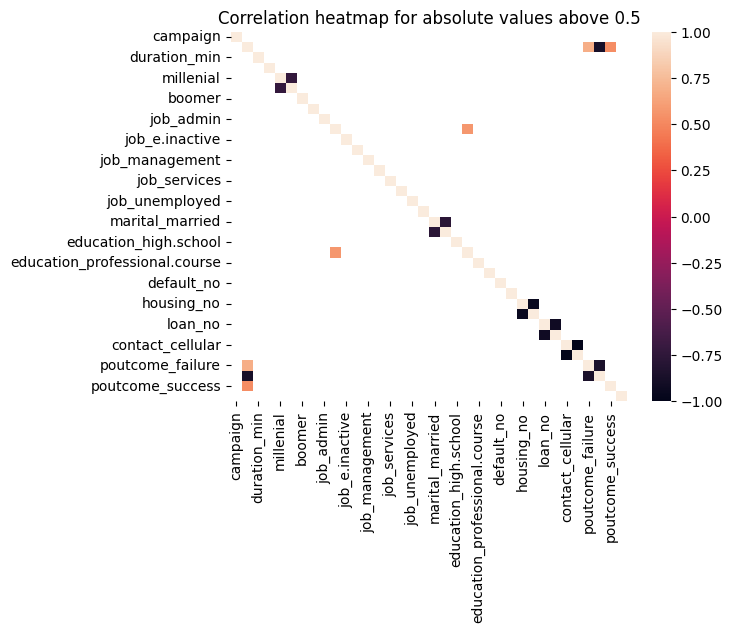

In [141]:
to_drop=['y_no', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5']

corr_matrix=bank_raw.drop(to_drop, axis=1).corr()

sns.heatmap(corr_matrix[corr_matrix.abs()>=0.5])
plt.title('Correlation heatmap for absolute values above 0.5')
plt.plot

In [142]:
# cols=['boomer', 'silent', 'job_e.inactive', 'job_unemployed', 'marital_divorced',
#        'education_high.school', 'education_high.school.less', 'default_yes',
#        'housing_yes', 'loan_yes', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'y_no', 'month_3', 'month_4',
#        'month_9', 'month_10', 'month_11','month_12', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5']

bank_clean=bank_raw.copy()
bank_clean.to_csv('/workspaces/machine-learning-banking-data/data/raw/bank_clean.csv', index=False)


## Spliting train and test data

In [143]:
bank_clean.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   campaign      8 non-null      float64
 1   previous      8 non-null      float64
 2   duration_min  8 non-null      float64
 3   gen_z         8 non-null      float64
 4   millenial     8 non-null      float64
 5   gen_x         8 non-null      float64
 6   boomer        8 non-null      float64
 7   silent        8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [144]:
# Dividing bank data intro train and test

X = bank_clean.drop(['y_yes', 'y_no'], axis = 1) #y_yes is the dependent variable, y_no is the inverse
y = bank_clean["y_yes"] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scaling continous variables
to_scale=['campaign', 'previous', 'duration_min']
scaler=MinMaxScaler()
scaler.fit(X_train[to_scale])

train_scl=pd.DataFrame(scaler.transform(X_train[to_scale]), index=X_train.index, columns=to_scale)#storing scaled variables as dataframe
test_scl=pd.DataFrame(scaler.transform(X_test[to_scale]), index=X_test.index, columns=to_scale)#storing scaled variables as dataframe

X_train_sc=X_train.copy()
X_train_sc[to_scale]=train_scl[to_scale] #replacing scaled variables into the train dataset

X_test_sc=X_test.copy()
X_test_sc[to_scale]=test_scl[to_scale] #replacing scaled variables into the test dataset

######Storing scaled and unscaled data and scaler

X_train.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_train_sc.csv', index=False) #UNscaled
X_train_sc.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_train_sc.csv', index=False) #Scaled
open("/workspaces/machine-learning-banking-data/data/interim/y_train.txt", "w").write(y_train.to_string(index=False))

X_test.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_test.csv', index=False) #UNscaled
X_test_sc.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_test_sc.csv', index=False) #Scaled
open("/workspaces/machine-learning-banking-data/data/interim/y_test.txt", "w").write(y_test.to_string(index=False))

dump(scaler, open('/workspaces/machine-learning-banking-data/data/interim/mm_scaler.pk', 'wb')) #storing scaler



In [145]:
#Here just double checking scaling went well
#####X_train_sc.describe().T
#####X_test_sc.describe().T

## Feature selection

In [146]:
# Selecting the 50% most relevant variables

selection_model = SelectKBest(f_classif, k = int(len(X_train_sc.columns)*0.5)) #f_classif works best with classification problems
selection_model.fit(X_train_sc, y_train)

mask = selection_model.get_support()
X_train_sc_sel = pd.DataFrame(selection_model.transform(X_train_sc), columns = X_train_sc.columns.values[mask])
X_train_sc_sel.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_train_sc_sel.csv', index=False)

X_test_sc_sel = pd.DataFrame(selection_model.transform(X_test_sc), columns = X_test_sc.columns.values[mask])
X_test_sc_sel.to_csv('/workspaces/machine-learning-banking-data/data/interim/X_test_sc_sel.csv', index=False)

# Machine learning

## Baseline logistic regression

The dependent variable y_yes is unbalanced. Meaning that the values of one category, in this case yes, are significantly lower than the other category (i.e., no). This unbalance can hinder model performance

Even if I delete all missing observations, it would lead me to a final sample of 30.4k osbervations, which is still not enough to make the model converge as the dependent variable would be still unbalanced (y=yes only has about 4k observations).


In [147]:
bank_model = LogisticRegression(solver='newton-cholesky', random_state=42)
bank_model.fit(X_train_sc_sel, y_train)#Training model with scaled-featured-selected data

LogisticRegression(random_state=42, solver='newton-cholesky')

In [148]:
X_train_sc_sel.columns#Training model with scaled-featured-selected data

Index(['campaign', 'previous', 'duration_min', 'gen_z', 'millenial', 'gen_x',
       'boomer', 'silent', 'job_blue-collar', 'job_e.inactive',
       'marital_married', 'marital_single', 'education_high.school.less',
       'education_university.degree', 'default_no', 'contact_cellular',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success',
       'month_3', 'month_4', 'month_5', 'month_9', 'month_10', 'month_12'],
      dtype='object')

### Accuracy of trained model(Baseline):

In [149]:
y_pred_ss= bank_model.predict(X_test_sc_sel)


When evaluating model performance of a logistic regression, accuracy is not the proper metric when the dependent variable y is umbalanced, which occurs in this case, because the model obtains higher accuracy on predicting the majority class, ignoring the minority one (on this data the minority is y=1, which is the class of interest). 

The F1 score is another metric that can provide additional model performance info in this scenario since it takes into account both precision and recall. A score closer to 1 suggests good balance between precision and recall, whereas an F1 score closer to 0 suggests the opposite.

Below, the baseline train model obtained an accuracy of 90% but an F1 score of 0.47, implying what was mentioned earlier, i.e., the model may perform better at predicting the majority class. 

In [150]:
print('Baseline Accuracy of LogReg with 50% of variables & scaled: ', accuracy_score(y_test, y_pred_ss))
print('F1 score (checking balance of y): ', f1_score(y_test, y_pred_ss))

Baseline Accuracy of LogReg with 50% of variables & scaled:  0.908671362642701
F1 score (checking balance of y):  0.4755927475592747


### Confusion matrix - trained model (Baseline)

According to the confusion matrix , the model predicted that 585 customers would not take the long-term deposit, when, in reality, they did (false negatives). Whereas the model predicted that 167 customers would take the long-term deposit, when, in reality, they did not (false positives). 

In this baseline model, the instances of false negative were higher than the false positives, meaning that, in practice, the current model could lead the bank to lose the deposits of 585 customers, while targeting it's efforts towards 167 customers that, in reality, would not end up hiring the deposit. 

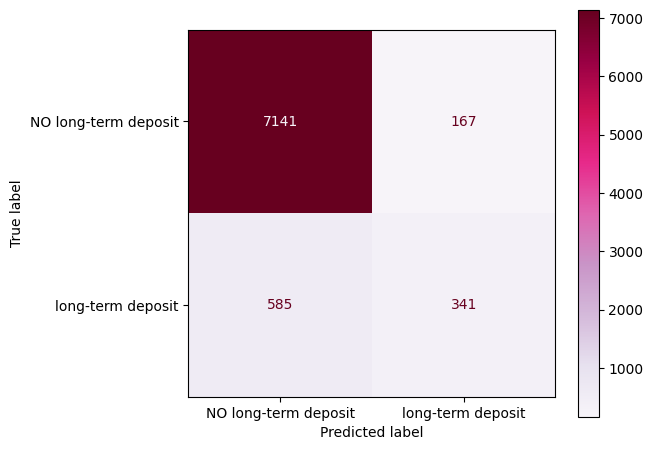

In [151]:
bank_cm = metrics.ConfusionMatrixDisplay(
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ss), display_labels = ['NO long-term deposit', 'long-term deposit']
    )
# plot CM
bank_cm.plot(cmap = 'PuRd')
plt.tight_layout()
plt.show()

The classification report provides more detailed metrics for the performance of the model on each of the classes. 

For class 0 (i.e., NOT hiring the deposit), 92% of the *predictions* of NO deposits were correct and 98% of the *real* cases of NO deposits were correctly predicted by the model. Overall, precision and recall are high, meaning that the model performs well on predicting no deposits. 

For class 1 (i.e., hiring the long-term deposit), 62% of the *predictions* of deposits were correct and only 37% of the *real* deposits were correctly predicted by the model. The low performance of the model on the recall suggests that in this class, the model has a higher rate of false negatives. As metioner earlier, high rate of false negatives on this context is not good as the bank could lose customers with the current model.  

In [152]:
print(metrics.classification_report(y_test, y_pred_ss))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7308
        True       0.67      0.37      0.48       926

    accuracy                           0.91      8234
   macro avg       0.80      0.67      0.71      8234
weighted avg       0.90      0.91      0.90      8234



# Optimised logistic regression

## Feature selection optimisation

The code below runs a loop and selects the best variables given for each % in prop, estimates the logistic model for each of the different % of selected features and then calculates metrics for each % and stores results in a dataframe


In [153]:
prop=[100, 80, 70, 60, 50]

metrics=pd.DataFrame( columns=['p','accuracy','f1_score'])
for i in prop:
    #feature selection
    selection_model = SelectKBest(f_classif, k = int(len(X_train_sc.columns) * (i/100) )) 
    selection_model.fit(X_train_sc, y_train)

    #Storing X data based on % of selected vars
    mask = selection_model.get_support()
    X_train_sc_sel = pd.DataFrame(selection_model.transform(X_train_sc), columns = X_train_sc.columns.values[mask])
    X_test_sc_sel = pd.DataFrame(selection_model.transform(X_test_sc), columns = X_test_sc.columns.values[mask])

    #Storing feature selection for each %
    dump(selection_model, open(f"/workspaces/machine-learning-banking-data/models/selectkscl{int(i)}.pk", "wb"))

    bank_model = LogisticRegression(solver='newton-cholesky', random_state=42)
    bank_model.fit(X_train_sc_sel, y_train)#Training model with scaled-featured-selected data
    y_pred_ss= bank_model.predict(X_test_sc_sel)
    result={
            'p':i, 
            'accuracy': accuracy_score(y_test, y_pred_ss), 
            'f1_score': f1_score(y_test, y_pred_ss)}
    metrics.loc[len(metrics)]=result


According to the graph below, the peak model performance is when selecting 60% of the variables:

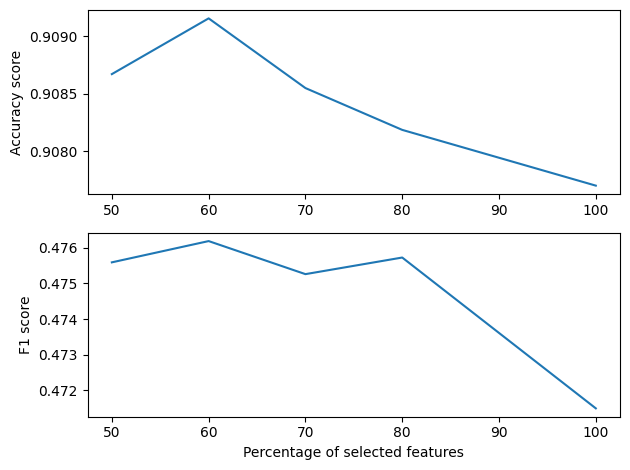

In [154]:
fig, ax=plt.subplots(2)
ax[0].plot( metrics['p'], metrics['accuracy'])
ax[0].set_ylabel('Accuracy score')

ax[1].plot( metrics['p'], metrics['f1_score'])
ax[1].set_ylabel('F1 score')
ax[1].set_xlabel('Percentage of selected features')

plt.tight_layout()
plt.show()


## Adjusting hyperparameters

Loading optimised selectkbest()

In [155]:
selection_model60 = load(open("/workspaces/machine-learning-banking-data/models/selectkscl60.pk", "rb"))

mask = selection_model60.get_support()
X_train_sc_sel = pd.DataFrame(selection_model60.transform(X_train_sc), columns = X_train_sc.columns.values[mask])
X_train_sc_sel.to_csv('/workspaces/machine-learning-banking-data/data/processed/X_train_sc_60p.csv', index=False)

X_test_sc_sel = pd.DataFrame(selection_model60.transform(X_test_sc), columns = X_test_sc.columns.values[mask])
X_test_sc_sel.to_csv('/workspaces/machine-learning-banking-data/data/processed/X_test_sc_60p.csv', index=False)

Setting up random search

In [156]:
bank_model = LogisticRegression(random_state=42)
bank_model.fit(X_train_sc_sel, y_train)#Training model with 60% of variables selected

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [157]:
hyprms = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "liblinear", "sag", "saga"],
        }
score=['accuracy', 'f1']

lr_acc_opt = RandomizedSearchCV(bank_model, hyprms, scoring=score, refit='accuracy',n_iter = 100, cv = 5, random_state = 42)
lr_acc_opt

lr_f1_opt = RandomizedSearchCV(bank_model, hyprms, scoring=score, refit='f1',n_iter = 100, cv = 5, random_state = 42)
lr_f1_opt

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'sag', 'saga']},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'])

Obtaining best hyperparameters: based on accuracy and based on F1-Score

In [158]:
lr_acc_opt.fit(X_train_sc_sel, y_train)
lr_f1_opt.fit(X_train_sc_sel, y_train)

best_acc=lr_acc_opt.best_params_
best_f1=lr_f1_opt.best_params_
print(f"Best hyperparameters based on accuracy: {best_acc}")
print(f"Best hyperparameters based on F1 score: {best_f1}")


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193:

Best hyperparameters based on accuracy: {'solver': 'saga', 'penalty': 'l2', 'C': 4.281332398719396}
Best hyperparameters based on F1 score: {'solver': 'sag', 'penalty': None, 'C': 0.03359818286283781}


### Optimised Log reg

According to the tunning, some combinations of penalties are not supported by some of the solvers. Hence why some combinations did not converge. Te result is:

Best hyperparameters based on accuracy: {'solver': 'saga', 'penalty': 'l2', 'C': 4.281332398719396}

Best hyperparameters based on F1 score: {'solver': 'sag', 'penalty': None, 'C': 0.03359818286283781}

In [159]:
best_acc=lr_acc_opt.best_params_
best_f1=lr_f1_opt.best_params_

Optimised based on accuracy:

In [160]:
bank_model_acc = LogisticRegression(**best_acc)
bank_model_acc.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.281332398719396, solver='saga')

In [164]:
y_pred_acc = bank_model_acc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_acc))
print('F1 score (works best for unbalanced y): ', f1_score(y_test, y_pred_acc))

Accuracy:  0.9074568860820986
F1 score (works best for unbalanced y):  0.48021828103683495


In [166]:
print(classification_report(y_test, y_pred_acc))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7308
        True       0.65      0.38      0.48       926

    accuracy                           0.91      8234
   macro avg       0.79      0.68      0.71      8234
weighted avg       0.89      0.91      0.90      8234



Optimised based on F1-Score:

In [167]:
bank_model_f1 = LogisticRegression(**best_f1)
bank_model_f1.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.03359818286283781, penalty=None, solver='sag')

In [168]:
y_pred_f1 = bank_model_f1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_f1))
print('F1 score (works best for unbalanced y): ', f1_score(y_test, y_pred_f1))

Accuracy:  0.9079426767063395
F1 score (works best for unbalanced y):  0.4829467939972715


In [169]:
print(classification_report(y_test, y_pred_f1))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7308
        True       0.66      0.38      0.48       926

    accuracy                           0.91      8234
   macro avg       0.79      0.68      0.72      8234
weighted avg       0.90      0.91      0.90      8234



The results look similar to the baseline model for both, the model optimised by accuracy and the one optimised by F1 score, there is a minor improvement on the F1 score after optimising. 